<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.352104,98.222342,61.094295,1.041947e-06,249.668742,249.668748,-0.000006
1,0.0,1.0,90.653907,54.188980,69.716881,-1.600762e-05,224.559752,224.559770,-0.000018
2,0.0,2.0,98.139324,40.370437,50.559631,-4.797891e-07,199.069391,199.069394,-0.000003
3,0.0,3.0,41.248354,34.659402,68.907567,1.901827e-05,154.815341,154.815309,0.000032
4,0.0,4.0,96.705913,62.812680,26.625052,-1.253434e-05,196.143633,196.143653,-0.000020
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,82.175404,28.841944,58.401299,-5.223243e-05,179.418595,179.418640,-0.000045
19996,999.0,16.0,93.213096,69.111485,25.389046,-4.930846e-06,197.713623,197.713641,-0.000018
19997,999.0,17.0,50.772045,35.116638,70.252223,8.054495e-07,166.140907,166.140890,0.000017
19998,999.0,18.0,42.589381,34.436340,44.659662,-4.532129e-05,131.685337,131.685371,-0.000034


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.352104,98.222342,61.094295,1.041947e-06,249.668742,249.668748,-0.000006
1,0.0,1.0,90.653907,54.188980,69.716881,-1.600762e-05,224.559752,224.559770,-0.000018
2,0.0,2.0,98.139324,40.370437,50.559631,-4.797891e-07,199.069391,199.069394,-0.000003
3,0.0,3.0,41.248354,34.659402,68.907567,1.901827e-05,154.815341,154.815309,0.000032
4,0.0,4.0,96.705913,62.812680,26.625052,-1.253434e-05,196.143633,196.143653,-0.000020
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,82.175404,28.841944,58.401299,-5.223243e-05,179.418595,179.418640,-0.000045
19996,999.0,16.0,93.213096,69.111485,25.389046,-4.930846e-06,197.713623,197.713641,-0.000018
19997,999.0,17.0,50.772045,35.116638,70.252223,8.054495e-07,166.140907,166.140890,0.000017
19998,999.0,18.0,42.589381,34.436340,44.659662,-4.532129e-05,131.685337,131.685371,-0.000034


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.352104  98.222342  61.094295  ...  249.668742  249.668748 -0.000006
      1.0    90.653907  54.188980  69.716881  ...  224.559752  224.559770 -0.000018
      2.0    98.139324  40.370437  50.559631  ...  199.069391  199.069394 -0.000003
      3.0    41.248354  34.659402  68.907567  ...  154.815341  154.815309  0.000032
      4.0    96.705913  62.812680  26.625052  ...  196.143633  196.143653 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   82.175404  28.841944  58.401299  ...  179.418595  179.418640 -0.000045
      16.0   93.213096  69.111485  25.389046  ...  197.713623  197.713641 -0.000018
      17.0   50.772045  35.116638  70.252223  ...  166.140907  166.140890  0.000017
      18.0   42.589381  34.436340  44.659662  ...  131.685337  131.685371 -0.000034
      19.0   24.785633  49.747880  95.880272  ...  180.413772  180.413759  0.000013

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.352104  98.222342  61.094295  ...  249.668742  249.668748 -0.000006
      1.0    90.653907  54.188980  69.716881  ...  224.559752  224.559770 -0.000018
      2.0    98.139324  40.370437  50.559631  ...  199.069391  199.069394 -0.000003
      3.0    41.248354  34.659402  68.907567  ...  154.815341  154.815309  0.000032
      4.0    96.705913  62.812680  26.625052  ...  196.143633  196.143653 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   82.175404  28.841944  58.401299  ...  179.418595  179.418640 -0.000045
      16.0   93.213096  69.111485  25.389046  ...  197.713623  197.713641 -0.000018
      17.0   50.772045  35.116638  70.252223  ...  166.140907  166.140890  0.000017
      18.0   42.589381  34.436340  44.659662  ...  131.685337  131.685371 -0.000034
      19.0   24.785633  49.747880  95.880272  ...  180.413772  180.413759  0.000013

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.352104,98.222342,61.094295,1.041947e-06,249.668742,249.668748,-0.000006
1,0.0,1.0,90.653907,54.188980,69.716881,-1.600762e-05,224.559752,224.559770,-0.000018
2,0.0,2.0,98.139324,40.370437,50.559631,-4.797891e-07,199.069391,199.069394,-0.000003
3,0.0,3.0,41.248354,34.659402,68.907567,1.901827e-05,154.815341,154.815309,0.000032
4,0.0,4.0,96.705913,62.812680,26.625052,-1.253434e-05,196.143633,196.143653,-0.000020
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,82.175404,28.841944,58.401299,-5.223243e-05,179.418595,179.418640,-0.000045
19996,999.0,16.0,93.213096,69.111485,25.389046,-4.930846e-06,197.713623,197.713641,-0.000018
19997,999.0,17.0,50.772045,35.116638,70.252223,8.054495e-07,166.140907,166.140890,0.000017
19998,999.0,18.0,42.589381,34.436340,44.659662,-4.532129e-05,131.685337,131.685371,-0.000034


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.352104  98.222342  61.094295  ...  249.668742  249.668748 -0.000006
      1.0    90.653907  54.188980  69.716881  ...  224.559752  224.559770 -0.000018
      2.0    98.139324  40.370437  50.559631  ...  199.069391  199.069394 -0.000003
      3.0    41.248354  34.659402  68.907567  ...  154.815341  154.815309  0.000032
      4.0    96.705913  62.812680  26.625052  ...  196.143633  196.143653 -0.000020
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   82.175404  28.841944  58.401299  ...  179.418595  179.418640 -0.000045
      16.0   93.213096  69.111485  25.389046  ...  197.713623  197.713641 -0.000018
      17.0   50.772045  35.116638  70.252223  ...  166.140907  166.140890  0.000017
      18.0   42.589381  34.436340  44.659662  ...  131.685337  131.685371 -0.000034
      19.0   24.785633  49.747880  95.880272  ...  180.413772  180.413759  0.000013

[20000 rows x 7 columns]

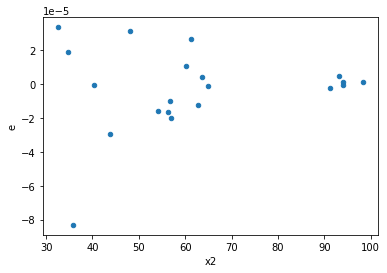

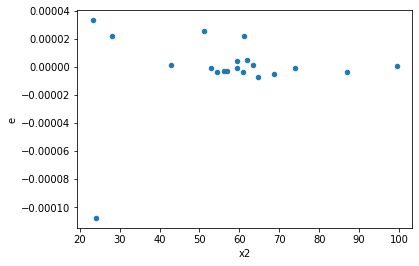

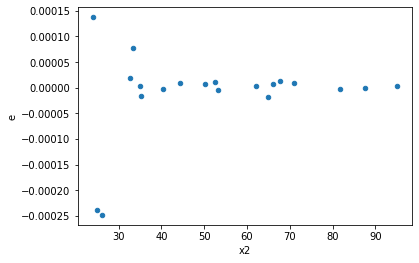

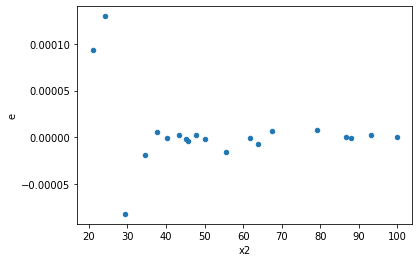

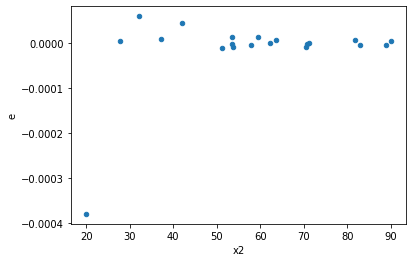

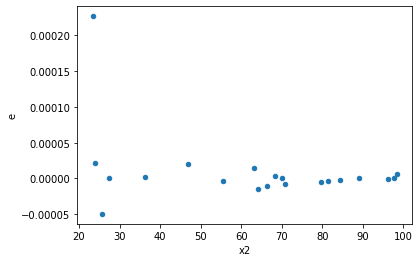

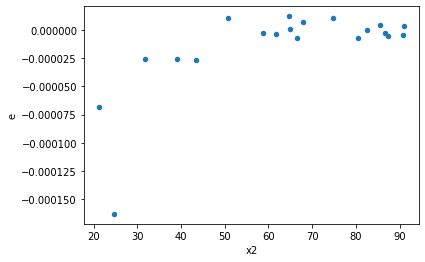

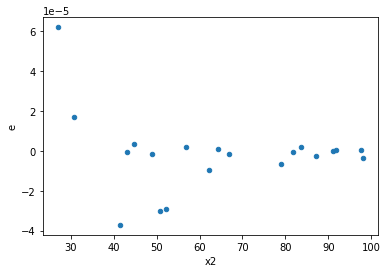

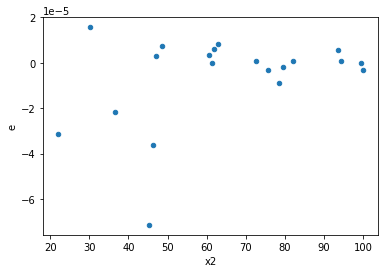

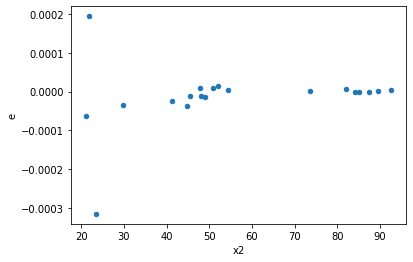

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
632.0,5.0,5.0,6.88343337799285e-11,5.666731174817941e-11,1.7208583444982125e-11,1.4166827937044853e-11,1.214709709290912,0.8361898145048554,0.5819050927475723,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,8.756422721670564e-11,6.159890766353484e-09,2.189105680417641e-11,1.539972691588371e-09,0.01421522402556201,0.00024890553029680056,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,4.14481764455973e-10,9.860314829097712e-09,1.0362044111399325e-10,2.465078707274428e-09,0.04203534792143153,0.0033988002280559686,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,2.166662013577328e-10,5.722768190856321e-08,5.41665503394332e-11,1.4306920477140802e-08,0.0037860384019034006,9.454338955219935e-06,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,1.408246199936424e-10,1.4811211009023676e-08,3.52061549984106e-11,3.702802752255919e-09,0.009507974729942444,9.25929258934137e-05,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,1.6352551065344997e-10,4.8229922323969804e-08,4.088137766336249e-11,1.2057480580992451e-08,0.003390540618229015,7.185418140150132e-06,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,1.7950706531440183e-11,4.248635943191258e-08,4.487676632860046e-12,1.0621589857978145e-08,0.0004225051703996307,3.980647521894482e-08,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,3.218151605041888e-11,7.832748122675165e-09,8.04537901260472e-12,1.9581870306687913e-09,0.0041085855878929675,1.1585141551103712e-05,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,3.2820509641051235e-11,1.9115731912254836e-09,8.205127410262809e-12,4.778932978063709e-10,0.017169371171192487,0.00039494054203977844,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,7.259790435384835e-11,7.173555186636475e-10,1.814947608846209e-11,1.7933887966591188e-10,0.1012021270695597,0.025129000551594824,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    942
Reject001=1 : Homoscedasticity       58
Name: Result_test, dtype: int64